## European options 1:
### Vanilla Call / Put

#### Black-Scholes model

In [11]:
import numpy as np
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


#### Bachelier model

In [13]:
def bachelier(S, K, T, r, sigma, option_type="call"):
    # Forward price
    F = S * np.exp(r * T)
    d = (F - K) / (sigma * np.sqrt(T))
    
    if option_type == "call":
        price = sigma * np.sqrt(T) * (d * norm.cdf(d) + norm.pdf(d))
    elif option_type == "put":
        price = sigma * np.sqrt(T) * (-d * norm.cdf(-d) + norm.pdf(d))
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


#### Black model

In [15]:
def black_model(F, K, T, r, sigma, option_type="call"):
    d1 = (np.log(F / K) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        price = np.exp(-r * T) * (F * norm.cdf(d1) - K * norm.cdf(d2))
    elif option_type == "put":
        price = np.exp(-r * T) * (K * norm.cdf(-d2) - F * norm.cdf(-d1))
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


#### Displaced-diffusion model

In [17]:
def displaced_diffusion(S, K, T, r, sigma, b, option_type="call"):
    # Adjusted price and strike
    S_adj = b * S + (1 - b) * K
    K_adj = b * K + (1 - b) * S
    sigma_adj = sigma * b

    # Black-Scholes style d1 and d2
    d1 = (np.log(S_adj / K_adj) + (r + 0.5 * sigma_adj**2) * T) / (sigma_adj * np.sqrt(T))
    d2 = d1 - sigma_adj * np.sqrt(T)
    
    if option_type == "call":
        price = S_adj * norm.cdf(d1) - K_adj * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = K_adj * np.exp(-r * T) * norm.cdf(-d2) - S_adj * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


In [19]:
# Parameters
S = 100      # Spot price
K = 110      # Strike price
T = 1        # Time to maturity (1 year)
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility
b = 0.7      # Displacement factor (for Displaced Diffusion)
F = S * np.exp(r * T)  # Forward price (for Black Model)

# Calculate option prices
bs_call = black_scholes(S, K, T, r, sigma, option_type="call")
bachelier_call = bachelier(S, K, T, r, sigma, option_type="call")
black_call = black_model(F, K, T, r, sigma, option_type="call")
displaced_call = displaced_diffusion(S, K, T, r, sigma, b, option_type="call")

print(f"Black-Scholes Call Price: {bs_call}")
print(f"Bachelier Call Price: {bachelier_call}")
print(f"Black Model Call Price: {black_call}")
print(f"Displaced Diffusion Call Price: {displaced_call}")


Black-Scholes Call Price: 6.040088129724239
Bachelier Call Price: 1.6668078130941398e-133
Black Model Call Price: 6.040088129724236
Displaced Diffusion Call Price: 6.343876342051125


## European options 2:
### Digital cash-or-nothing call / put

#### Black-Scholes model
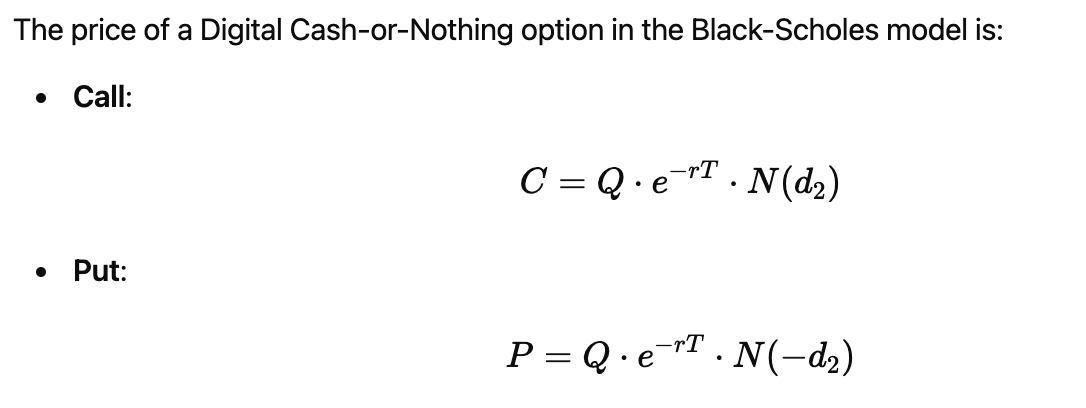

In [25]:
def digital_cash_or_nothing_black_scholes(S, K, T, r, sigma, Q, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        price = Q * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = Q * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


In [90]:
S = 100     # Spot price
K = 120      # Strike price
T = 1        # Time to maturity (1 year)
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility
b = 0.7      # Displacement factor (for Displaced Diffusion)
F = S * np.exp(r * T)  # Forward price (for Black Model)
print(F)
Q = 10       # Fixed payout (cash)

digital_cash_or_nothing_black_scholes(S, K, T, r, sigma, Q, option_type="call")

105.12710963760242


2.1226405311626584

#### Bachelier model
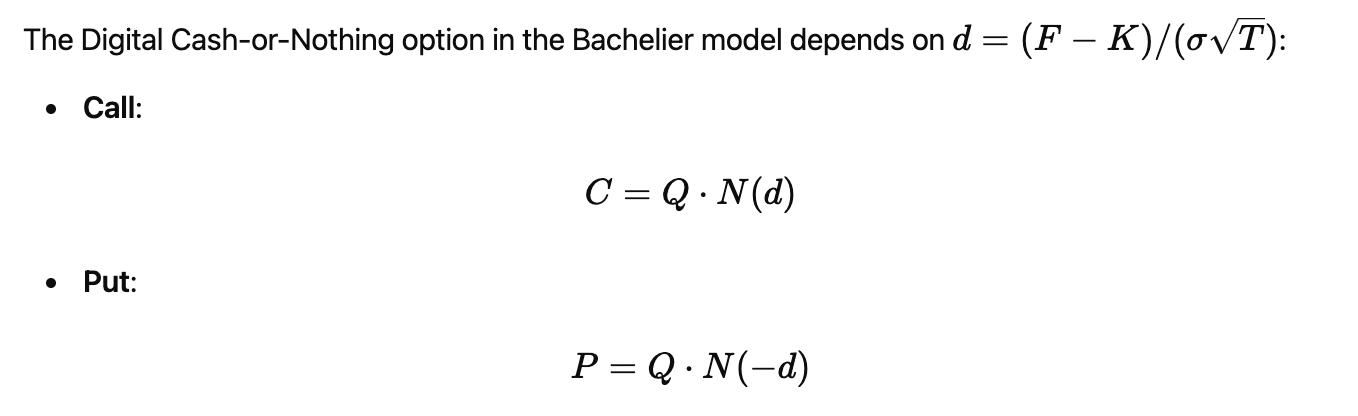

In [98]:
def digital_cash_or_nothing_bachelier(S, K, T, r, sigma, Q, option_type="call"):
    # Forward price
    F = S * np.exp(r * T)
    print(F)
    d = (F - K) / (sigma * np.sqrt(T))
    print(d)
    if option_type == "call":
        price = Q * norm.cdf(d)
    elif option_type == "put":
        price = Q * norm.cdf(-d)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


In [106]:
S = 100      # Spot price
K = 110      # Strike price
T = 1        # Time to maturity (1 year)
r = 0.05     # Risk-free rate
sigma = 5  # Volatility
b = 0.7      # Displacement factor (for Displaced Diffusion)
F = S * np.exp(r * T)  # Forward price (for Black Model)
# print(F)
Q = 10       # Fixed payout (cash)

digital_cash_or_nothing_bachelier(S, K, T, r, sigma, Q, option_type="call")

105.12710963760242
-0.9745780724795168


1.648847974302503

#### Black model
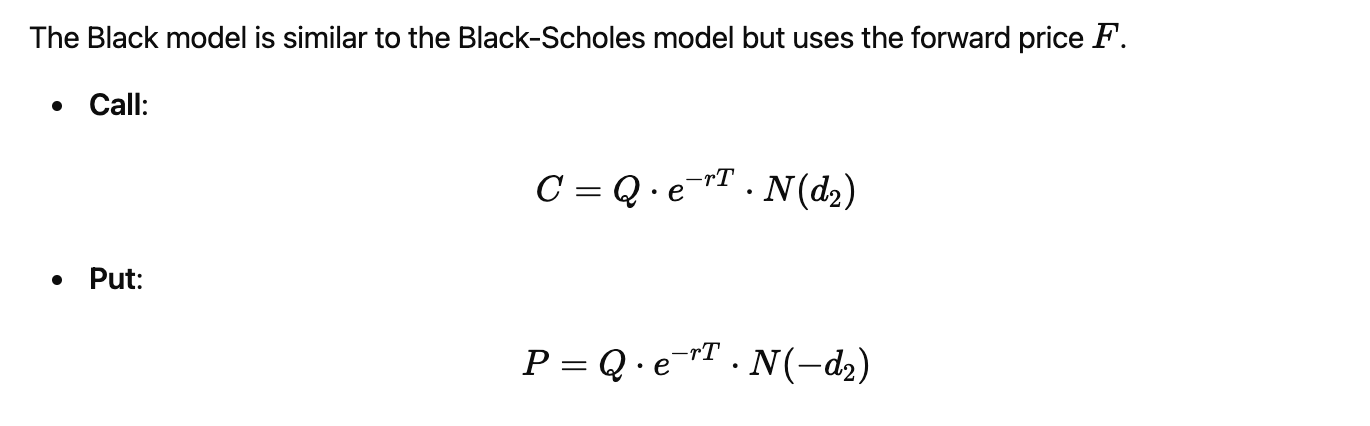

In [31]:
def digital_cash_or_nothing_black(F, K, T, r, sigma, Q, option_type="call"):
    d1 = (np.log(F / K) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        price = Q * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = Q * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


#### Displaced-diffusion model
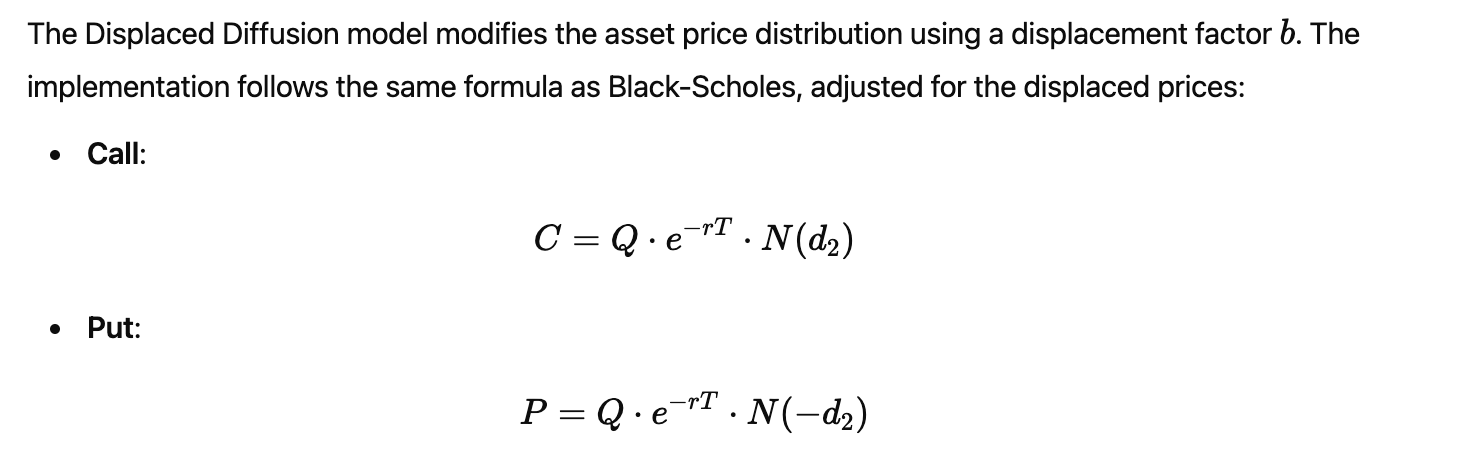

In [34]:
def digital_cash_or_nothing_displaced(S, K, T, r, sigma, Q, b, option_type="call"):
    # Adjusted price and strike
    S_adj = b * S + (1 - b) * K
    K_adj = b * K + (1 - b) * S
    sigma_adj = sigma * b

    # Black-Scholes style d1 and d2
    d1 = (np.log(S_adj / K_adj) + (r + 0.5 * sigma_adj**2) * T) / (sigma_adj * np.sqrt(T))
    d2 = d1 - sigma_adj * np.sqrt(T)
    
    if option_type == "call":
        price = Q * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = Q * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


In [36]:
# Parameters
S = 100      # Spot price
K = 110      # Strike price
T = 1        # Time to maturity (1 year)
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility
b = 0.7      # Displacement factor (for Displaced Diffusion)
F = S * np.exp(r * T)  # Forward price (for Black Model)
Q = 10       # Fixed payout (cash)

# Calculate prices
bs_call = digital_cash_or_nothing_black_scholes(S, K, T, r, sigma, Q, option_type="call")
bachelier_call = digital_cash_or_nothing_bachelier(S, K, T, r, sigma, Q, option_type="call")
black_call = digital_cash_or_nothing_black(F, K, T, r, sigma, Q, option_type="call")
displaced_call = digital_cash_or_nothing_displaced(S, K, T, r, sigma, Q, b, option_type="call")

print(f"Black-Scholes Digital Cash-or-Nothing Call Price: {bs_call}")
print(f"Bachelier Digital Cash-or-Nothing Call Price: {bachelier_call}")
print(f"Black Model Digital Cash-or-Nothing Call Price: {black_call}")
print(f"Displaced Diffusion Digital Cash-or-Nothing Call Price: {displaced_call}")


Black-Scholes Digital Cash-or-Nothing Call Price: 3.5386095394539416
Bachelier Digital Cash-or-Nothing Call Price: 2.037349906406224e-130
Black Model Digital Cash-or-Nothing Call Price: 3.5386095394539443
Displaced Diffusion Digital Cash-or-Nothing Call Price: 4.813072000915331


## European options 3:
### Digital asset-or-nothing call / put

#### Black-Scholes model
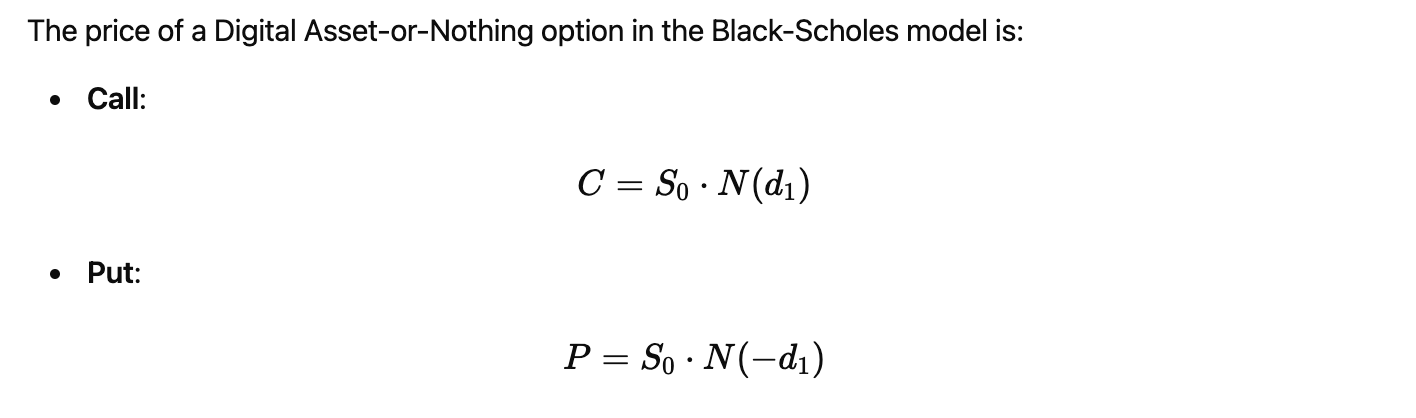

In [39]:
def digital_asset_or_nothing_black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    
    if option_type == "call":
        price = S * norm.cdf(d1)
    elif option_type == "put":
        price = S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


#### Bachelier model
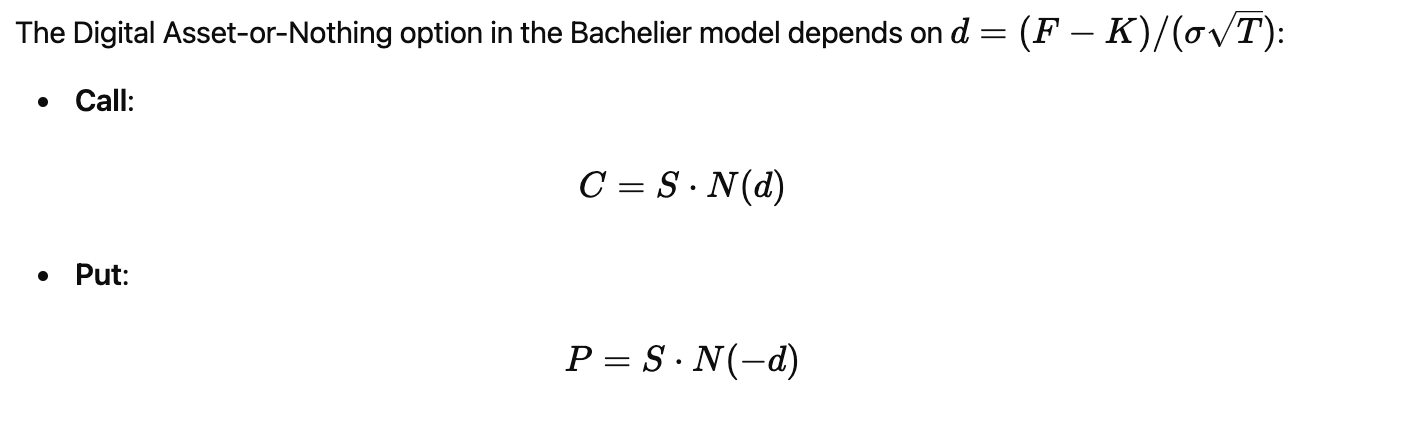

In [42]:
def digital_asset_or_nothing_bachelier(S, K, T, r, sigma, option_type="call"):
    # Forward price
    F = S * np.exp(r * T)
    d = (F - K) / (sigma * np.sqrt(T))
    
    if option_type == "call":
        price = S * norm.cdf(d)
    elif option_type == "put":
        price = S * norm.cdf(-d)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


#### Black model
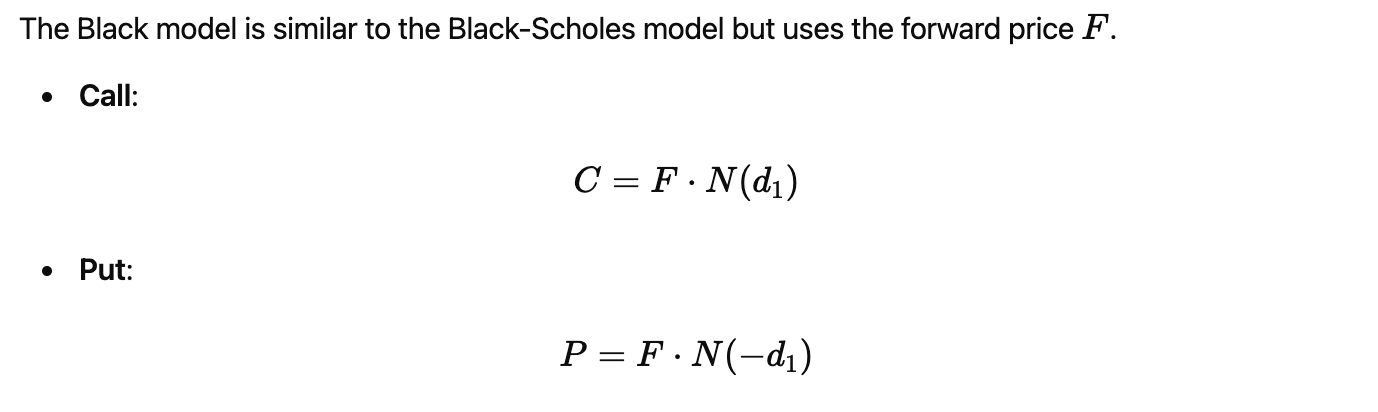

In [45]:
def digital_asset_or_nothing_black(F, K, T, r, sigma, option_type="call"):
    d1 = (np.log(F / K) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    
    if option_type == "call":
        price = F * norm.cdf(d1)
    elif option_type == "put":
        price = F * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price


#### Displaced-diffusion model
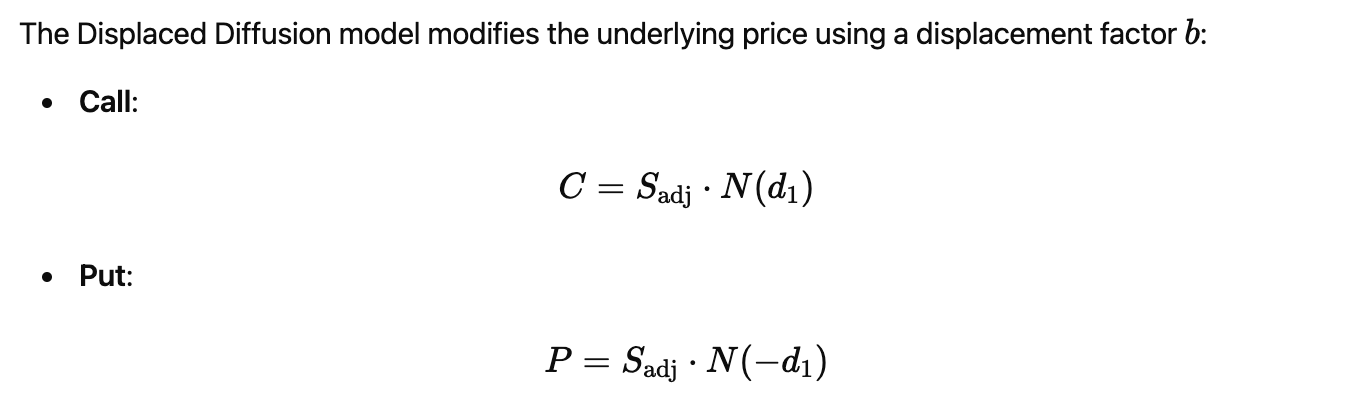

In [52]:
def digital_asset_or_nothing_displaced(S, K, T, r, sigma, b, option_type="call"):
    # Adjusted price and strike
    S_adj = b * S + (1 - b) * K
    K_adj = b * K + (1 - b) * S
    sigma_adj = sigma * b

    # Black-Scholes style d1
    d1 = (np.log(S_adj / K_adj) + (r + 0.5 * sigma_adj**2) * T) / (sigma_adj * np.sqrt(T))
    
    if option_type == "call":
        price = S_adj * norm.cdf(d1)
    elif option_type == "put":
        price = S_adj * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")
    
    return price



In [56]:
# Parameters
S = 100      # Spot price
K = 110      # Strike price
T = 1        # Time to maturity (1 year)
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility
b = 0.7      # Displacement factor (for Displaced Diffusion)
F = S * np.exp(r * T)  # Forward price (for Black Model)

# Calculate prices
bs_call = digital_asset_or_nothing_black_scholes(S, K, T, r, sigma, option_type="call")
bachelier_call = digital_asset_or_nothing_bachelier(S, K, T, r, sigma, option_type="call")
black_call = digital_asset_or_nothing_black(F, K, T, r, sigma, option_type="call")
displaced_call = digital_asset_or_nothing_displaced(S, K, T, r, sigma, b, option_type="call")

print(f"Black-Scholes Digital Asset-or-Nothing Call Price: {bs_call}")
print(f"Bachelier Digital Asset-or-Nothing Call Price: {bachelier_call}")
print(f"Black Model Digital Asset-or-Nothing Call Price: {black_call}")
print(f"Displaced Diffusion Digital Asset-or-Nothing Call Price: {displaced_call}")


Black-Scholes Digital Asset-or-Nothing Call Price: 44.96479306371759
Bachelier Digital Asset-or-Nothing Call Price: 2.037349906406224e-129
Black Model Digital Asset-or-Nothing Call Price: 47.270187302415465
Displaced Diffusion Digital Asset-or-Nothing Call Price: 57.84374675184517
